<a href="https://colab.research.google.com/github/melikaminari/datastories_for_emme/blob/main/ex_10_Melina_Kaminari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import spacy

In [ ]:
!python -m spacy download el_core_news_sm

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
ertnews_df=pd.read_csv('/content/drive/MyDrive/ertnews.gr-MAY23.csv')
ertnews_df

,site,url,date,section,title,author,text
0,ertnews.gr,https://www.ertnews.gr/eidiseis/o-santiago-pen...,2023-05-01,Αμερική,"Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης",Συντακτική ομάδα ertnews.gr,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-t...,2023-05-01,ΔΙΕΘΝΗ,Συνάντηση του αρχηγού του ουκρανικού στρατού μ...,Συντακτική ομάδα ertnews.gr,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
2,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/rosia-...,2023-05-01,ΔΙΕΘΝΗ,Ρωσία: Απεβίωσε σε ηλικία 85 ετών ο διάσημος σ...,Συντακτική Ομάδα ertnews.gr,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...
3,ertnews.gr,https://www.ertnews.gr/eidiseis/katastrafike-k...,2023-05-01,ΕΛΛΑΔΑ,Καταστράφηκε καφετέρια στην Αρτέμιδα απο πυρκαγιά,Συντακτική ομάδα ertnews.gr,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...
4,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/tourki...,2023-05-01,ΔΙΕΘΝΗ,Τουρκία: Ο «φερόμενος ηγέτης» του Ισλαμικού Κρ...,Συντακτική Ομάδα ertnews.gr,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...
...,...,...,...,...,...,...,...
4875,ertnews.gr,https://www.ertnews.gr/eidiseis/epistimi/ereyn...,2023-05-31,ΕΠΙΣΤΗΜΗ,Έρευνα: Πώς επηρεάζει τον εγκέφαλο η καρδιακή ...,Εύη Τσιριγωτάκη,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...
4876,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/dania-...,2023-05-31,ΔΙΕΘΝΗ,Δανία: Η πρωθυπουργός εκφώνησε ομιλία από το C...,Συντακτική ομάδα ertnews.gr,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...
4877,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-p...,2023-05-31,Πολιτική,Συνάντηση ΠτΔ Κ. Σακελλαροπούλου με τον Αρχιεπ...,Συντακτική Ομάδα ertnews.gr,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...
4878,ertnews.gr,https://www.ertnews.gr/eidiseis/ellada/politik...,2023-05-31,Πολιτική,ΥΠΕΞ: Βαθιά θλίψη για την απώλεια του Θεόδωρου...,Συντακτική ομάδα ertnews.gr,Σε ανακοίνωση προέβη το Υπουργείο Εξωτερικών γ...


In [ ]:
len(ertnews_df)

4880

In [ ]:
ertnews_df.head(1)

,site,url,date,section,title,author,text
0,ertnews.gr,https://www.ertnews.gr/eidiseis/o-santiago-pen...,2023-05-01,Αμερική,"Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης",Συντακτική ομάδα ertnews.gr,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."


In [ ]:
short_ertnews_df = ertnews_df[['date','text' ]]
short_ertnews_df


,date,text
0,2023-05-01,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
2,2023-05-01,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...
3,2023-05-01,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...
4,2023-05-01,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...
...,...,...
4875,2023-05-31,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...
4876,2023-05-31,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...
4877,2023-05-31,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...
4878,2023-05-31,Σε ανακοίνωση προέβη το Υπουργείο Εξωτερικών γ...


In [ ]:
short_ertnews_df.dtypes

date    datetime64[ns]
text            object
dtype: object

In [ ]:
short_ertnews_df['date'] = pd.to_datetime(short_ertnews_df['date'], format='%Y-%m-%d %H:%M')

<ipython-input-25-e989f79742b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_ertnews_df['date'] = pd.to_datetime(short_ertnews_df['date'], format='%Y-%m-%d %H:%M')


In [ ]:
short_ertnews_df.dtypes

date    datetime64[ns]
text            object
dtype: object

In [ ]:
short_ertnews_df.head()

,date,text
0,2023-05-01,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
2,2023-05-01,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...
3,2023-05-01,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...
4,2023-05-01,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...


In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_ertnews_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(4880, 13161)

In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
negative_words.tail()

13147           αλιμονο
13148     επιδεινωνεται
13152    κατειργασμενος
13155         κιτρινιζω
13156         ουρλιασμα
Name: word, dtype: object

In [ ]:
positive_words.tail()

13109      ζωτικης σημασιας
13132            αδιαβροχος
13137          καλωσορισατε
13145    απροσδοκητα ευρημα
13158              νεοτερος
Name: word, dtype: object

In [ ]:
wordcount_df[trust_words].sum(axis=1)

0        3
1        1
2        1
3        0
4        3
        ..
4875     9
4876    10
4877     2
4878     1
4879     2
Length: 4880, dtype: int64

In [ ]:
short_ertnews_df.head(3)

,date,text
0,2023-05-01,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
2,2023-05-01,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...


In [ ]:
short_ertnews_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_ertnews_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_ertnews_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_ertnews_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_ertnews_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_ertnews_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_ertnews_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_ertnews_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_ertnews_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_ertnews_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_ertnews_df

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-05-01,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ...",0,4,1,1,1,3,2,0,0,0
1,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...,2,3,1,1,1,1,1,2,5,2
2,2023-05-01,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...,1,6,2,1,1,1,2,1,1,1
3,2023-05-01,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...,1,2,0,0,0,0,1,0,1,1
4,2023-05-01,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...,0,3,0,0,0,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4875,2023-05-31,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...,9,18,2,10,7,9,3,11,19,11
4876,2023-05-31,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...,5,12,2,3,2,10,3,3,11,4
4877,2023-05-31,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...,0,2,0,2,0,2,1,0,0,0
4878,2023-05-31,Σε ανακοίνωση προέβη το Υπουργείο Εξωτερικών γ...,2,1,0,0,0,1,1,4,3,2


In [ ]:
short_ertnews_df.reset_index(inplace=True)
short_ertnews_df.set_index('date', inplace=True)
short_ertnews_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2023-05-01,0,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ...",0,4,1,1,1,3,2,0,0,0
2023-05-01,1,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...,2,3,1,1,1,1,1,2,5,2
2023-05-01,2,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...,1,6,2,1,1,1,2,1,1,1
2023-05-01,3,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...,1,2,0,0,0,0,1,0,1,1
2023-05-01,4,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...,0,3,0,0,0,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,4875,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...,9,18,2,10,7,9,3,11,19,11
2023-05-31,4876,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...,5,12,2,3,2,10,3,3,11,4
2023-05-31,4877,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...,0,2,0,2,0,2,1,0,0,0


<Axes: xlabel='date'>

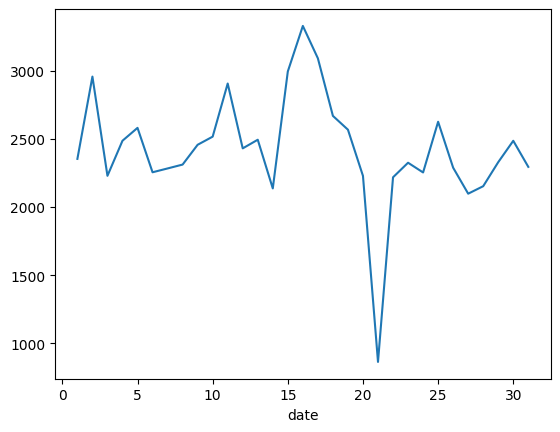

In [ ]:
short_ertnews_df['text'].str.len().groupby(by=short_ertnews_df.index.day).mean().plot()

<Axes: xlabel='date'>

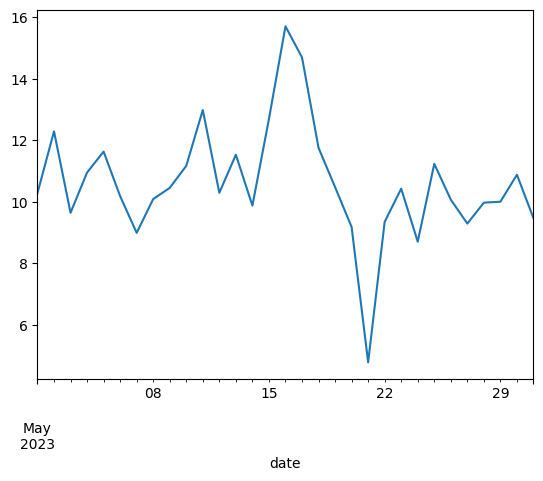

In [ ]:
short_ertnews_df['positive'].resample('D').mean().plot()

<Axes: xlabel='date'>

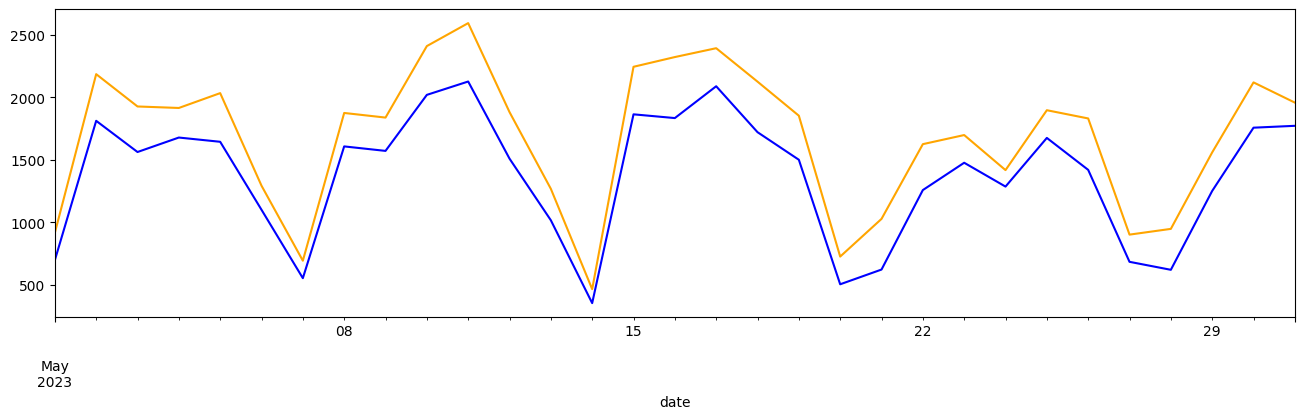

In [ ]:
ax = short_ertnews_df['negative'].resample('D').sum().plot(figsize=(16,4), color = 'blue')
short_ertnews_df['positive'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'orange')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
#plt.style.use('classic')
#plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

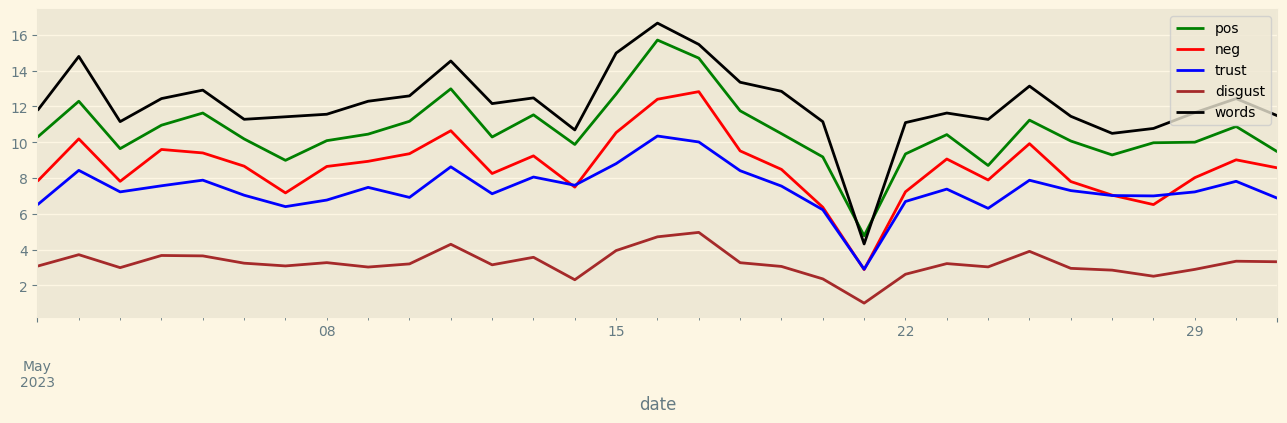

In [ ]:
ax = short_ertnews_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_ertnews_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_ertnews_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_ertnews_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_ertnews_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

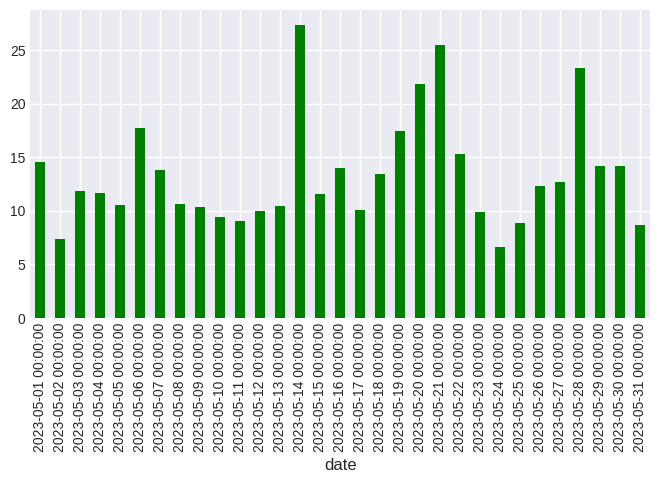

In [ ]:
short_ertnews_df['(-)αρνητικότητα | θετικότητα(+)'] = short_ertnews_df.positive*100//short_ertnews_df[['positive','negative']].sum(
        axis=1) - short_ertnews_df.negative*100//short_ertnews_df[['positive','negative']].sum(axis=1)

short_ertnews_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_ertnews_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))